### [ D1116 자동차 부품 품질 검사 데이터 분석 ]

In [8]:
import pandas as pd
import seaborn as sns
# Load dataset
df = pd.read_csv('../Data/smart_quality_inspection_dataset.csv')

df.head(), df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HOG_F1       1854 non-null   float64
 1   HOG_F2       1854 non-null   float64
 2   HOG_F3       1854 non-null   float64
 3   HOG_F4       1854 non-null   float64
 4   HOG_F5       1854 non-null   float64
 5   HOG_F6       1854 non-null   float64
 6   HOG_F7       1854 non-null   float64
 7   HOG_F8       1854 non-null   float64
 8   HOG_F9       1854 non-null   float64
 9   HOG_F10      1854 non-null   float64
 10  Temperature  1854 non-null   float64
 11  Vibration    1854 non-null   float64
 12  Acoustic     1854 non-null   float64
 13  Fault_Type   1854 non-null   object 
dtypes: float64(13), object(1)
memory usage: 202.9+ KB


(     HOG_F1    HOG_F2    HOG_F3    HOG_F4    HOG_F5    HOG_F6    HOG_F7  \
 0  0.046846  0.747276 -0.115297 -0.920363 -1.195644 -0.953782 -1.143734   
 1 -0.086770  1.413315  0.429374  0.424495  0.174386  0.275093  0.322255   
 2 -0.536923  0.184367 -1.079265 -1.473758 -1.279324 -0.073878 -1.615569   
 3 -0.369409 -0.483601  0.296536  0.596621  0.296258 -1.310473 -0.189909   
 4  0.525870 -0.312140 -0.311123  1.108442 -0.053811 -0.473454 -0.308574   
 
      HOG_F8    HOG_F9   HOG_F10  Temperature  Vibration   Acoustic  \
 0  2.891212 -0.877729 -0.038431    63.621048   0.705596  52.986256   
 1 -0.627408 -0.917360  0.058642    58.142729   3.463638  49.447204   
 2  1.949660  1.952232  0.885493    57.099583   5.502285  23.220863   
 3  0.533266 -2.361538 -1.105311    70.307374   6.750232  44.256296   
 4 -0.275646 -0.834540 -0.222531    59.947956   5.152318  36.517987   
 
       Fault_Type  
 0  Surface Crack  
 1       No Fault  
 2       No Fault  
 3    Overheating  
 4       No Fa

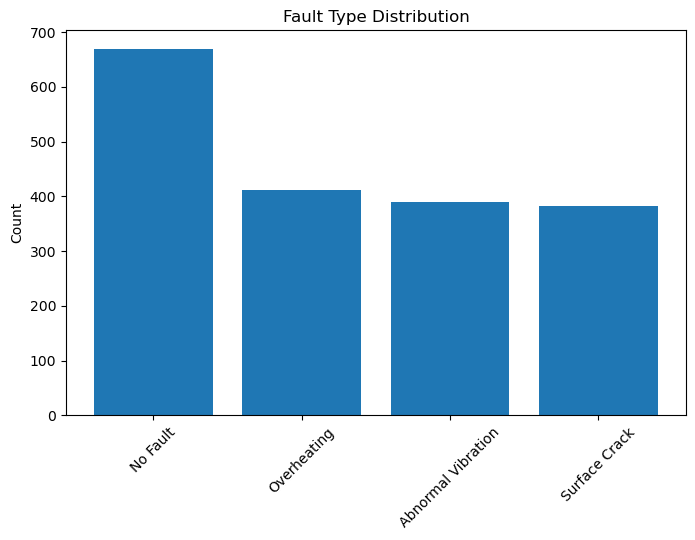

In [9]:
import matplotlib.pyplot as plt


## 겷함 유형별 분포 확인
fault_counts = df['Fault_Type'].value_counts()

plt.figure(figsize=(8,5))
plt.bar(fault_counts.index, fault_counts.values)
plt.title('Fault Type Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


,Temperature,Vibration,Acoustic
Fault_Type,,,
Abnormal Vibration,60.35,12.73,49.89
No Fault,60.22,4.99,49.94
Overheating,90.58,5.06,49.16
Surface Crack,59.61,4.74,66.48


,Temperature,Vibration,Acoustic
Fault_Type,,,
Abnormal Vibration,59.57,12.80,49.90
No Fault,60.10,4.91,50.03
Overheating,90.67,5.17,49.00
Surface Crack,59.51,4.70,66.16


<Figure size 700x400 with 0 Axes>

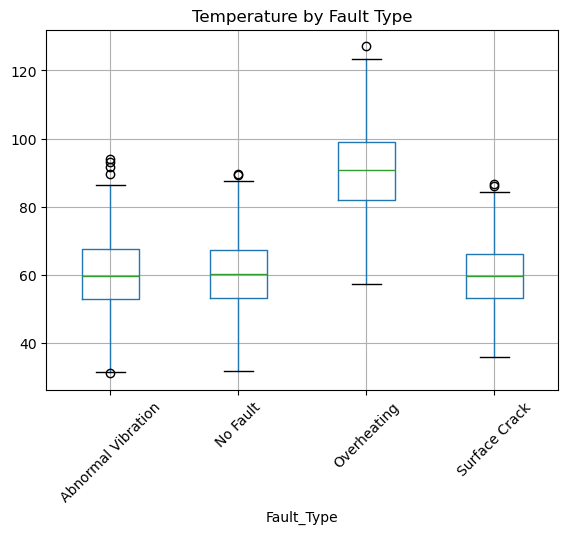

<Figure size 700x400 with 0 Axes>

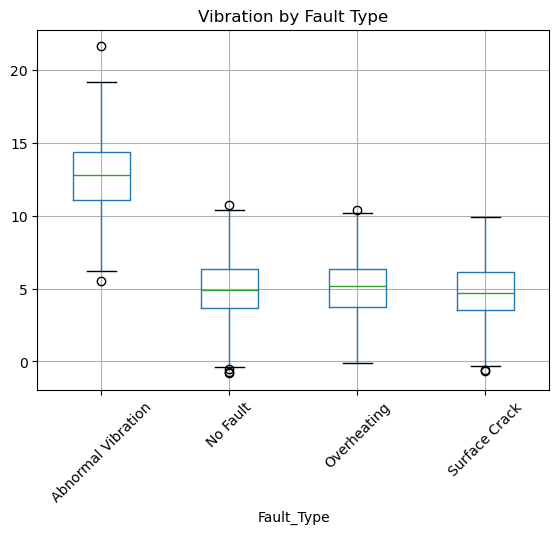

<Figure size 700x400 with 0 Axes>

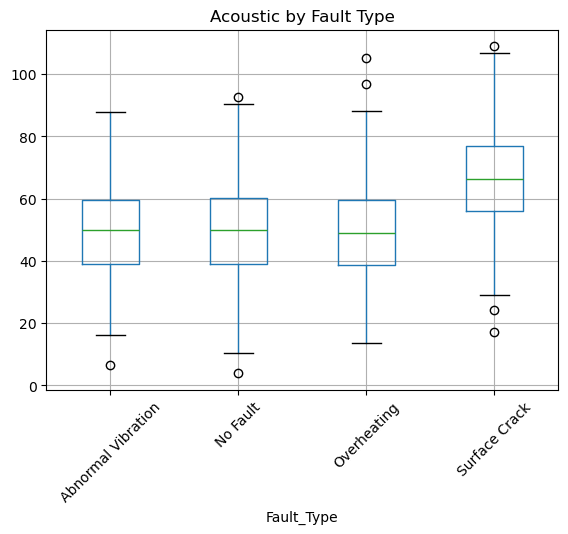

In [14]:
## 각 결함 유형별 어떤 센서 특징이 있는지
sensor_cols = ['Temperature', 'Vibration', 'Acoustic']
sensor_summary = df.groupby('Fault_Type')[sensor_cols].mean().round(2)
sensor_summary
display(df.groupby('Fault_Type')[sensor_cols].mean().round(2) )
display(df.groupby('Fault_Type')[sensor_cols].median().round(2) )



for col in sensor_cols:
    plt.figure(figsize=(7,4))
    df.boxplot(col, by='Fault_Type')
    plt.title(f"{col} by Fault Type")
    plt.suptitle("")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
## hog과 결함과의 관계 특징
hog_cols = [col for col in df.columns if 'HOG' in col]

hog_summary = df.groupby('Fault_Type')[hog_cols].mean().round(3)
hog_summary


# plt.figure(figsize=(10,6))
# sns.heatmap(hog_summary, annot=True, cmap='viridis')
# plt.title('HOG Feature Mean by Fault Type')
# plt.show()



,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10
Fault_Type,,,,,,,,,,
Abnormal Vibration,-0.000,-0.006,0.011,-0.041,-0.035,0.009,-0.064,0.072,-0.077,0.038
No Fault,-0.019,0.039,0.000,0.016,0.024,0.048,0.004,-0.003,0.018,0.017
Overheating,0.023,0.005,0.059,-0.023,-0.060,-0.001,0.063,0.009,0.081,-0.073
Surface Crack,0.046,-0.041,0.027,0.003,0.010,0.082,0.073,-0.083,-0.090,0.044


<Figure size 700x400 with 0 Axes>

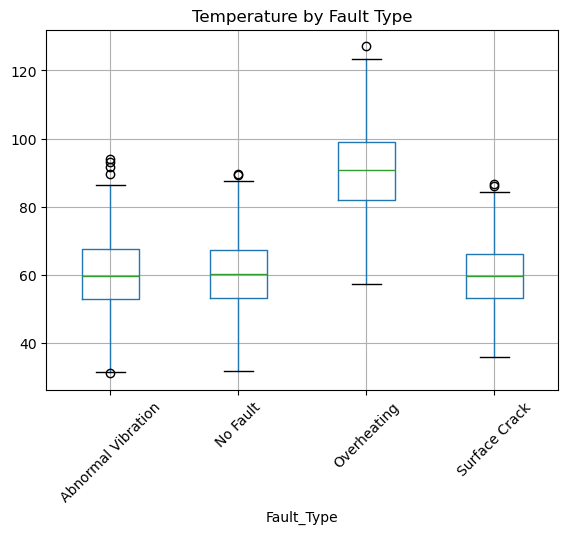

<Figure size 700x400 with 0 Axes>

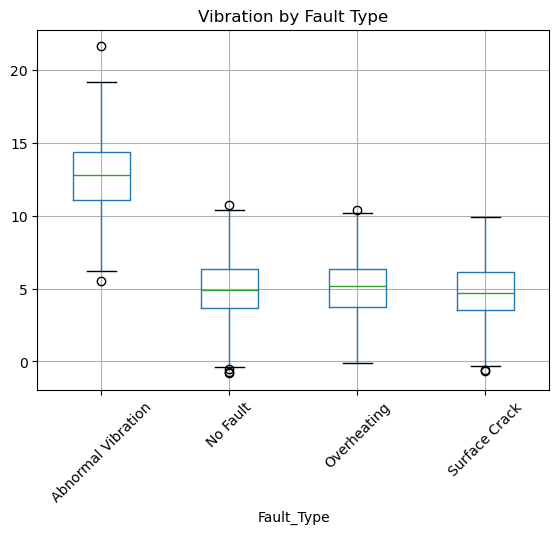

<Figure size 700x400 with 0 Axes>

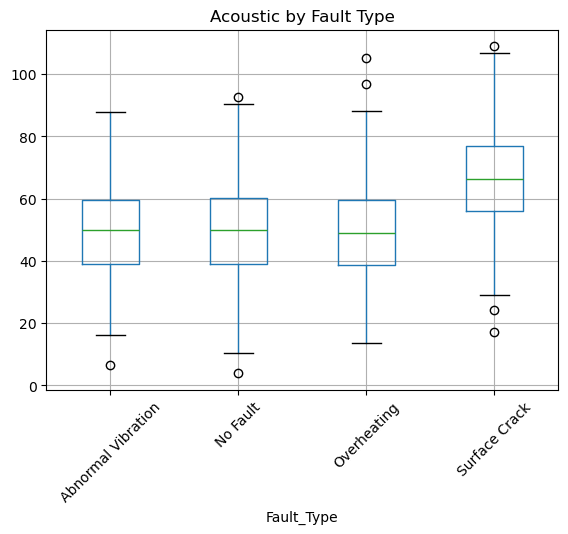

In [ ]:
## 온도 및 진동 기반 실시간 알림 시스템 추가 => 장비 과부화 예방 => 설비 가동류 향상
